# Regression Machine Learning Case Study Project
How do we work through a predictive modeling machine learning problem end-to-end? In this section we will work through a case study regression predictive modeling problem in Python including each step of the applied machine learning process.

## 1. Problem Definition
For this project we will investigate the Boston House Price dataset. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI Machine Learning Repository):
<ul>
 
<li> CRIM     per capita crime rate by town</li>
<li> ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li> INDUS    proportion of non-retail business acres per town</li>
<li> CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li> NOX      nitric oxides concentration (parts per 10 million)</li>
<li> RM       average number of rooms per dwelling</li>
<li> AGE      proportion of owner-occupied units built prior to 1940</li>
<li> DIS      weighted distances to five Boston employment centres</li>
 <li>RAD      index of accessibility to radial highways</li>
<li> TAX      full-value property-tax rate per 10,000 dollars </li>
<li> PTRATIO  pupil-teacher ratio by town</li>
<li> B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li> LSTAT    % lower status of the population</li>
<li> MEDV     Median value of owner-occupied homes in 1000's dollars</li>
 </ul>

## 2. Load the Data
Let’s start off by loading the libraries required for this project.

In [85]:
# Load libraries
import numpy
import pandas
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
         'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

## 3. Analyze Data


In [48]:
# shape
print(dataset.shape)
# types
print(dataset.dtypes)
# head
print(dataset.head(10))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
       CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD    TAX  PTRATIO  \
0  6.32e-03  18.0   2.31     0  0.54  6.58   65.2  4.09    1  296.0     15.3   
1  2.73e-02   0.0   7.07     0  0.47  6.42   78.9  4.97    2  242.0     17.8   
2  2.73e-02   0.0   7.07     0  0.47  7.18   61.1  4.97    2  242.0     17.8   
3  3.24e-02   0.0   2.18     0  0.46  7.00   45.8  6.06    3  222.0     18.7   
4  6.91e-02   0.0   2.18     0  0.46  7.15   54.2  6.06    3  222.0     18.7   
5  2.99e-02   0.0   2.18     0  0.46  6.43   58.7  6.06    3  222.0     18.7   
6  8.83e-02  12.5   7.87     0  0.52  6.01   66.6  5.56    5  311.0     15.2   
7  1.45e-01  12.5   7.87     0  0.52  6.17   96.1  5.95    5  311.0   

We can confirm that the scales for the attributes are all over the place because of the differing units. We may benefit from some transforms later on.
<br>Let’s summarize the distribution of each attribute.</br>

In [4]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


We now have a better feeling for how different the attributes are. The min and max values as well are the means vary a lot.
We are likely going to get better results by rescaling the data in some way.
<br>Now, let’s now take a look at the correlation between all of the numeric attributes.</br>

In [5]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

This is interesting. We can see that many of the attributes have a strong correlation (e.g.> 0.70 or < −0.70). For example:
<ul>
    <li>NOX and INDUS with 0.76.</li>
    <li>DIS and INDUS with -0.71.</li>
    <li>TAX and INDUS with 0.72.</li>
    <li>AGE and NOX with 0.73.</li>
    <li>DIS and NOX with -0.77.</li>
</ul>
It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74.

## 4. Data Visualization
### 4.1 Unimodal Data Visualization
Let’s look at visualizations of individual attributes. It is often useful to look at our data using multiple different visualizations in order to spark ideas. Let’s look at histograms of each attribute to get a sense of the data distributions.

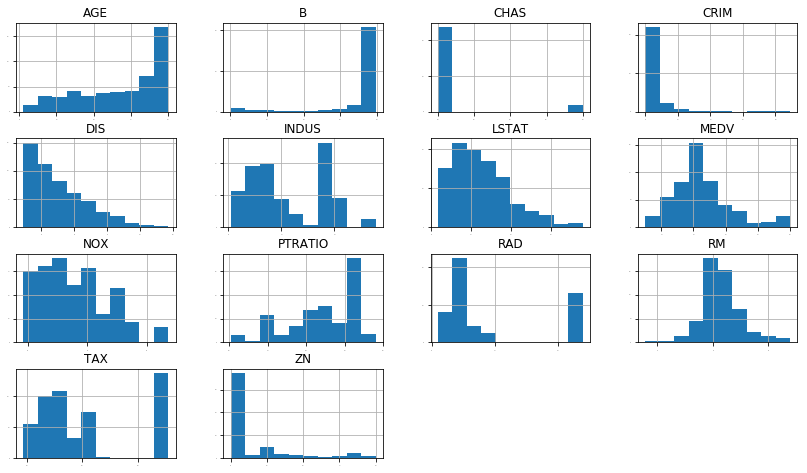

In [25]:
# histograms
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=[14,8])
pyplot.show()

We can see that some attributes may have an exponential distribution, such as CRIM, ZN, AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX.
<br>Let’s look at the same distributions using density plots that smooth them out a bit.</br>

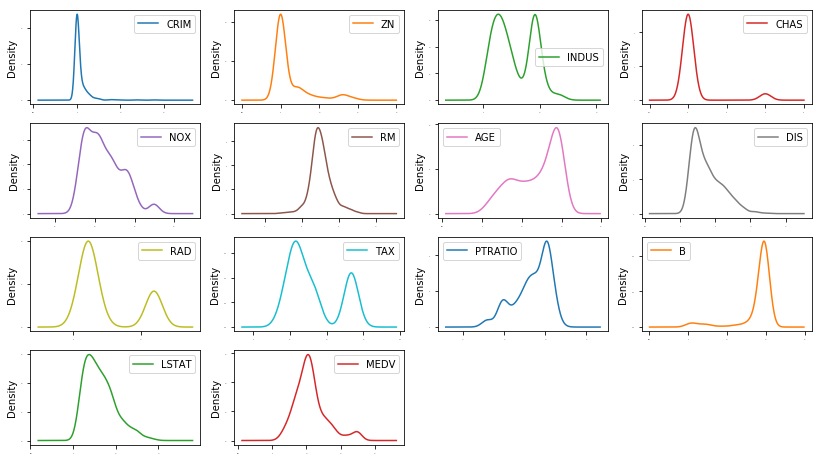

In [24]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False,  fontsize=1,  figsize=[14,8])
pyplot.show()

This perhaps adds more evidence to our suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.
<br>Let’s look at the data with box and whisker plots of each attribute.</br>

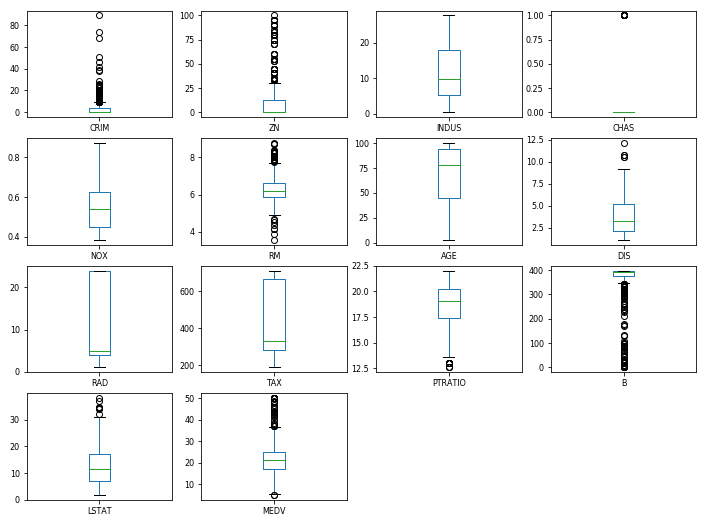

In [19]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=[12,9])
pyplot.show()

This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots).

### 4.2 Multimodal Data Visualization
Let’s look at some visualizations of the interactions between variables. The best place to start is a scatter plot matrix.

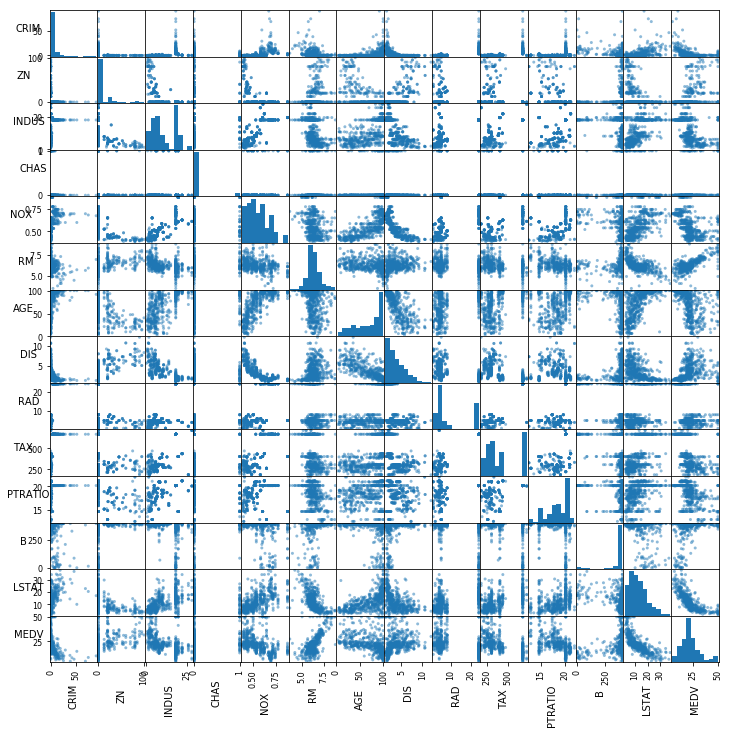

In [76]:
# scatter plot matrix
scatter_matrix = pandas.plotting.scatter_matrix(dataset, figsize=[12,12])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

Let’s also visualize the correlations between the attributes.

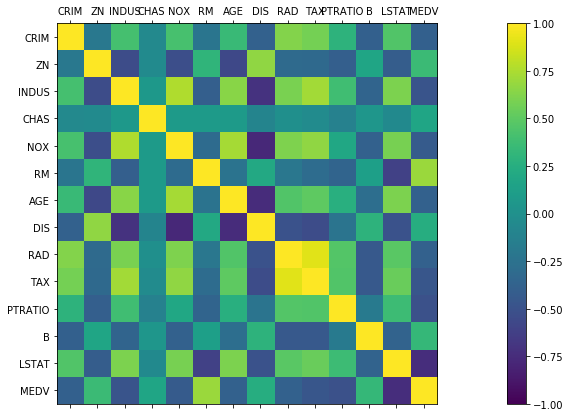

In [62]:
# correlation matrix
fig = pyplot.figure(figsize=[25,7])
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

The dark yellow color shows positive correlation whereas the dark green color shows negative correlation. We can also see some dark yellow and dark green that suggest candidates for removal to better improve accuracy of models later on.

## 5. Data Validation
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [63]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                                                test_size=validation_size, random_state=seed)

## 6. Evaluate Algorithms: Baseline
We have no idea what algorithms will do well on this problem. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [67]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [64]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.

In [95]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -23.104485 (8.661931)
SVR: -85.518342 (31.994798)


It looks like LR has the lowest MSE, followed closely by CART.

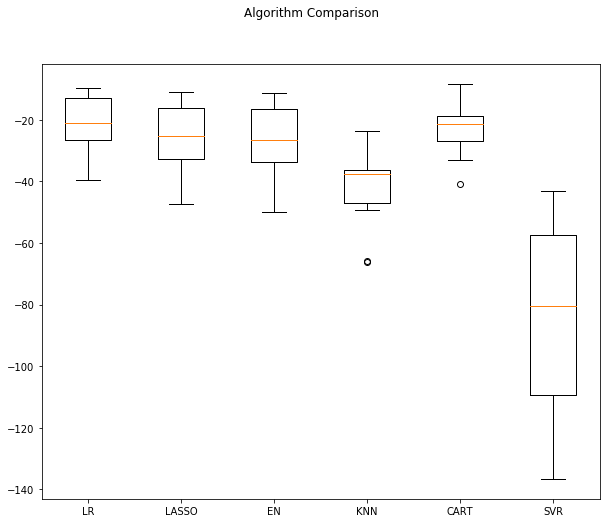

In [96]:
# Compare Algorithms
fig = pyplot.figure(figsize=[10,8])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.
<br>The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN. In the next section we will look at running the same algorithms using a standardized copy of the data.</br>

## 7. Evaluate Algorithms: Standardization
We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [71]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -25.715107 (13.046064)
ScaledSVR: -29.633086 (17.009186)


Running the example provides a list of mean squared errors. We can see that scaling did
have an effect on KNN, driving the error lower than the other models.
<br>Let’s take a look at the distribution of the scores across the cross-validation folds.</br>

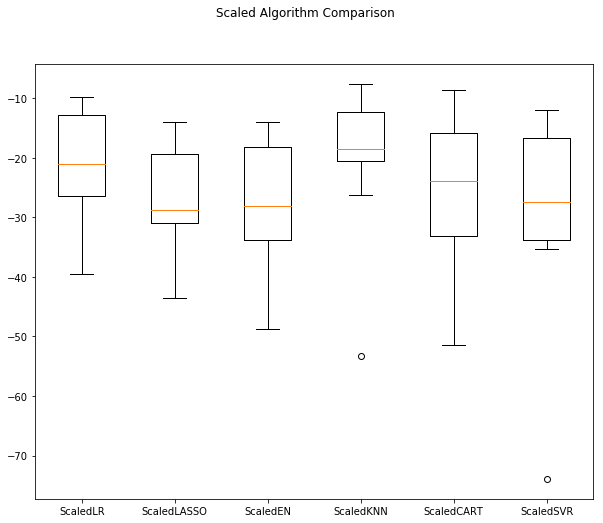

In [75]:
# Compare Algorithms
fig = pyplot.figure(figsize=[10,8])
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see that KNN has both a tight distribution of error and has the lowest score.

## 8. Improving Results with Tuning
We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary
range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross-validation on a standardized copy of the training dataset.

In [86]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


You can see that the best for k (n_neighbors) is 3 providing a mean squared error of -18.172137, the best so far.

## 9. Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
<ul>
    <li>Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).</li>
    <li> Bagging Methods: Random Forests (RF) and Extra Trees (ET).</li>
</ul>
We will use the same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold.


In [87]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -14.951474 (7.144550)
ScaledGBM: -10.087142 (4.459350)
ScaledRF: -13.117526 (6.728853)
ScaledET: -10.856174 (6.818706)


Running the example calculates the mean squared error for each method using the default parameters. We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.
<br>We can also plot the distribution of scores across the cross-validation folds.</br>

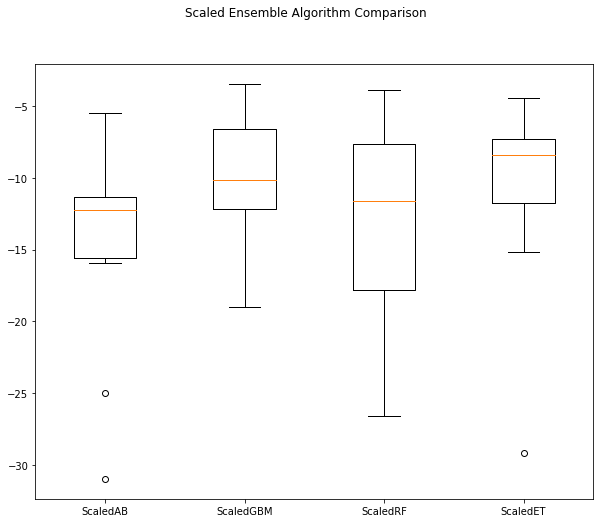

In [89]:
# Compare Algorithms
fig = pyplot.figure(figsize=[10,8])
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score.

## 10. Tune Ensemble Methods
The default number of boosting stages to perform (n_estimators) is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross-validation.

In [90]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


We can see that the best configuration was n_estimators=400 resulting in a mean squared error of -9.356471, about 0.65 units better than the untuned method.


## 11. Finalize Model
In this section we will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.


In [91]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.875252079219903


We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.